In [1]:
from pathlib import Path
import xarray as xr
import easygems.healpix as egh


In [2]:
# loc = Path("/glade/derecho/scratch/brianpm/healpix/")

loc = Path("/glade/derecho/scratch/andrew/hackathon/scream/")

for zoom in range(1,11):
    # zfil = loc / f"scream2D_ne120_all_hp{zoom}_v6.zarr"
    zfil = loc / f"scream2D_hrly_rlut_hp{zoom}_v6.zarr"
    print(f"zoom = {zoom}, exists: {zfil.exists()}")
    ds = xr.open_dataset(zfil)
    print(ds['rlut'].shape)

zoom = 1, exists: True
(9457, 48)
zoom = 2, exists: True
(9457, 192)
zoom = 3, exists: True
(9457, 768)
zoom = 4, exists: True
(9457, 3072)
zoom = 5, exists: True
(9457, 12288)
zoom = 6, exists: True
(9457, 49152)
zoom = 7, exists: True
(9457, 196608)
zoom = 8, exists: True
(9457, 786432)
zoom = 9, exists: True
(9457, 3145728)
zoom = 10, exists: True
(9457, 12582912)


In [4]:
xsample = ds['rsdt'].squeeze()

print(f"Size of xsample: {xsample.size}, Units: {xsample.attrs.get("units", "NONE")}, Minimum: {xsample.min().item()}, Maximum: {xsample.max().item()}")

Size of xsample: 2433024, Units: W/m2, Minimum: 0.0, Maximum: 1374.4619140625


In [16]:
xsample

<xarray.DataArray 'rsdt' (time: 3168, cell: 768)> Size: 10MB
array([[1.887767e+00, 2.037034e+01, 8.142082e-02, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.017014e+02, 6.376526e+02, 4.224676e+02, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.158861e+03, 1.220928e+03, 1.130977e+03, ..., 2.840343e+00,
        0.000000e+00, 2.060318e-01],
       ...,
       [1.061814e+00, 2.880864e-03, 1.381067e+01, ..., 1.081591e+03,
        1.176905e+03, 1.164272e+03],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 3.463779e+02,
        5.614286e+02, 4.721891e+02],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        5.499564e+00, 3.672629e-01]], dtype=float32)
Coordinates:
  * time     (time) object 25kB 2019-08-01 03:00:00 ... 2020-09-01 00:00:00
Dimensions without coordinates: cell
Attributes:
    averaging_count_tracker:  avg_count_Scalar2D_ncol
    long_name:                SW_flux_dn_at_model_top
    units:                    W/m2

In [7]:
tsample = xsample.isel(time=100)

<Figure size 640x480 with 0 Axes>

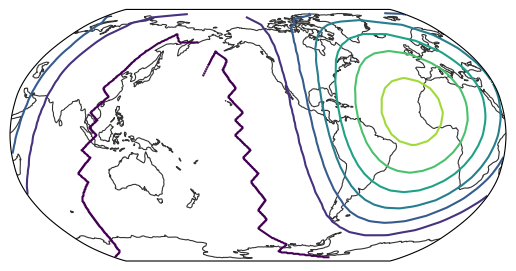

In [8]:
egh.healpix_contour(tsample)

In [9]:
# An improved contour method:
import numpy as np
from cartopy.util import add_cyclic_point

def healpix_contour_cyc(
    var, dpi=None, ax=None, method="linear", nest=True, add_coastlines=True, **kwargs
):
    if ax is None:
        ax = egh.get_current_geoaxis(add_coastlines=add_coastlines)
    fig = ax.get_figure()

    if dpi is not None:
        fig.set_dpi(dpi)

    _, _, nx, ny = np.array(ax.bbox.bounds, dtype=int)

    xlims = ax.get_xlim()
    ylims = ax.get_ylim()

    im = egh.healpix_resample(var, xlims, ylims, nx, ny, ax.projection, method, nest)
    # Add cyclic point
    cyclic_data, cyclic_lon = add_cyclic_point(im, coord=im.x)

    return ax.contour(cyclic_lon, im.y, cyclic_data, **kwargs)


def healpix_contourf_cyc(
    var, dpi=None, ax=None, method="linear", nest=True, add_coastlines=True, **kwargs
):
    if ax is None:
        ax = egh.get_current_geoaxis(add_coastlines=add_coastlines)
    fig = ax.get_figure()

    if dpi is not None:
        fig.set_dpi(dpi)

    _, _, nx, ny = np.array(ax.bbox.bounds, dtype=int)

    xlims = ax.get_xlim()
    ylims = ax.get_ylim()

    im = egh.healpix_resample(var, xlims, ylims, nx, ny, ax.projection, method, nest)
    # Add cyclic point
    cyclic_data, cyclic_lon = add_cyclic_point(im, coord=im.x)

    return ax.contourf(cyclic_lon, im.y, cyclic_data, **kwargs)



ValueError: Points cannot contain NaN

<Figure size 640x480 with 0 Axes>

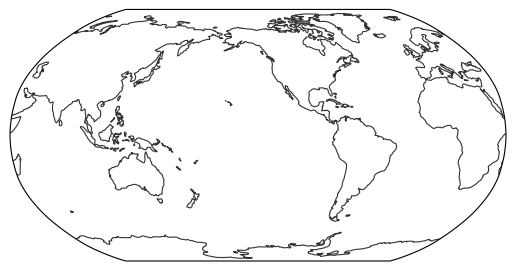

In [10]:
healpix_contourf_cyc(xsample)
# add_cyclic_point?

print(arr)
print(arr.max())

(np.float64(-8625154.6651), np.float64(8625154.6651))

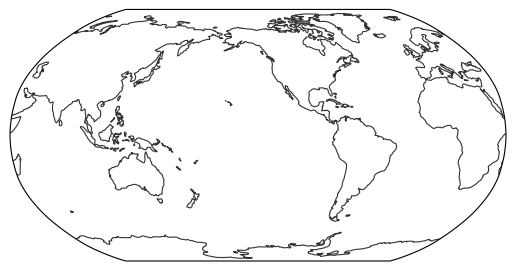

In [19]:
myaxis = egh.create_geoaxis(add_coastlines=True)

myaxis.get_xlim()
myaxis.get_ylim()

In [12]:
egh.isel_extent(egh.attach_coords(ds), (10, 90, -45, 45))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  24,  25,  26,
        32,  33,  34,  35,  36,  37,  38,  40,  41, 260, 261, 263, 272,
       273, 274, 275, 276, 277, 278, 279, 280, 281, 283, 284, 285, 286,
       287, 308, 309, 311, 322, 328, 329, 330, 331, 334, 352, 353, 354,
       355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367,
       370, 376, 377, 378, 379, 382, 533, 534, 535, 537, 538, 539, 540,
       541, 542, 543, 549, 550, 551, 553, 555, 556, 557, 558, 559, 560,
       561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573,
       574, 575])

In [13]:
lons, lats = egh.healpix.pix2ang(egh.get_nside(ds), ds.get('cell'), nest=egh.get_nest(ds), lonlat=True)

In [14]:
egh.get_nside(ds)

8

In [15]:
egh.healpix.pix2ang(np.array([1, 2, 4, 8]), 11, nest=True, lonlat=True)

TypeError: only integer scalar arrays can be converted to a scalar index